# Analyse : Évolution du prix de certains produits au Bénin en 2024
Cette analyse examine l'évolution des prix de certains produits au Bénin en 2024, en lien avec l'interdiction d'exportation des céréales et tubercules annoncée en mai. Cet embargo, vise à garantir la disponibilité des produits à des prix raisonnables sur les marchés locaux. L'étude observe les variations des prix avant, pendant et après l'annonce de cette mesure pour évaluer son impact.

In [1]:
# Importation des biliothèques nécessaires
import pandas as pd
import mplfinance as mpf

In [2]:
def process_and_plot_candlestick_data(file_path, chart_title):
    """
    Paramètres:
    - file_path : str, chemin du fichier CSV contenant les données.
    - chart_title : str, titre du graphique.
    """
    
    # Charger les données depuis le fichier CSV
    df = pd.read_csv(file_path)

    # Affichage du DataFrame d'origine
    print("DataFrame d'origine :")
    print(df)
    print("\n")
    
    # Conversion du format '01/12/23' en format datetime (assume day first)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

    # Ajout d'une colonne 'Mois_Annee' pour grouper par mois et année
    df['Mois_Annee'] = df['Date'].dt.to_period('M')

    # Groupement par Mois et Année
    grouped_df = df.groupby('Mois_Annee')

    monthly_stats = df.groupby('Mois_Annee').agg(
    Open=('Prix', 'mean'),  # On utilisera 'Close' pour le mois précédent après
    Close=('Prix', 'mean'),
    High=('Prix', 'max'),
    Low=('Prix', 'min')
    ).reset_index()

    # Décalage de la colonne 'Close' pour obtenir 'Open'
    monthly_stats['Open'] = monthly_stats['Close'].shift(1)

    # Conversion de 'Mois_Annee' en date pour la colonne 'Date'
    monthly_stats['Date'] = monthly_stats['Mois_Annee'].dt.to_timestamp()

    # Réorganiser les colonnes
    candlestick_data = monthly_stats[['Date', 'Open', 'Close', 'High', 'Low']]

    # Affichage du DataFrame des chandeliers
    print("DataFrame pour le graphique en chandeliers :")
    print(candlestick_data)
    print("\n")

    # Filtrer les données à partir de janvier 2024
    candlestick_data = candlestick_data[candlestick_data['Date'] >= '2024-01-01']

    # Création du graphique en chandeliers avec le titre personnalisé via mplfinance
    mpf.plot(candlestick_data.set_index('Date'), type='candle', style='charles', ylabel='Prix', title=chart_title)

## Variation du prix du Maïs séchés en grains vendus au détail (1KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   248
1   02/12/23  Porto-Novo   273
2   03/12/23     Parakou   248
3   04/12/23  Natitingou   201
4   05/12/23     Bohicon   203
5   06/12/23     Lokossa   216
6   01/01/24     Cotonou   248
7   02/01/24  Porto-Novo   276
8   03/01/24     Parakou   248
9   04/01/24  Natitingou   201
10  05/01/24     Bohicon   205
11  06/01/24     Lokossa   217
12  01/02/24     Cotonou   300
13  02/02/24  Porto-Novo   317
14  03/02/24     Parakou   280
15  04/02/24  Natitingou   219
16  05/02/24     Bohicon   251
17  06/02/24     Lokossa   263
18  01/03/24     Cotonou   360
19  02/03/24  Porto-Novo   347
20  03/03/24     Parakou   336
21  04/03/24  Natitingou   289
22  05/03/24     Bohicon   317
23  06/03/24     Lokossa   366
24  01/04/24     Cotonou   408
25  02/04/24  Porto-Novo   360
26  03/04/24     Parakou   347
27  04/04/24  Natitingou   312
28  05/04/24     Bohicon   377
29  06/04/24     Lokossa   438
30  01/05/24     

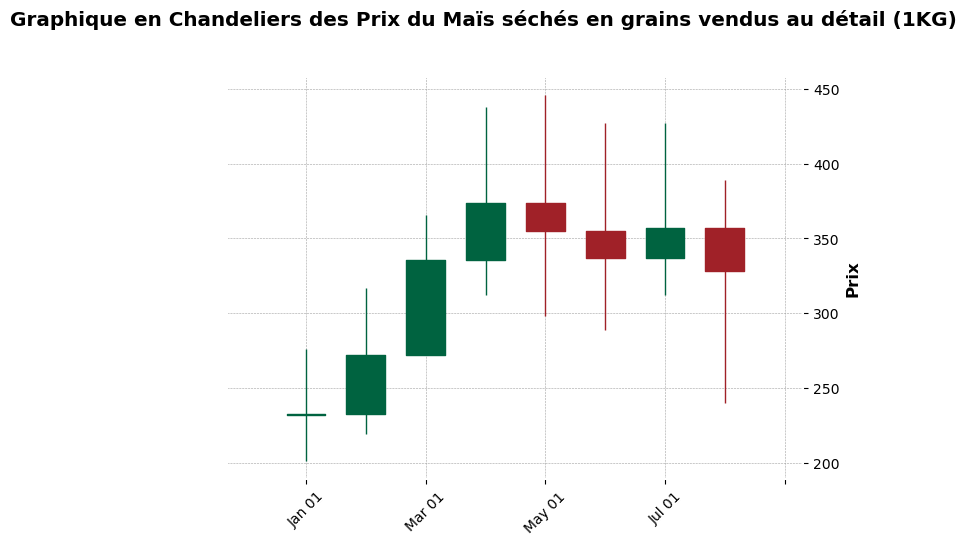

In [3]:
# Utilisation de la fonction sur les prix pour le Maïs séchés en grains vendus au détail (1KG)
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Maïs séchés en grains vendus au détail (1KG).csv"
chart_title = "Graphique en Chandeliers des Prix du Maïs séchés en grains vendus au détail (1KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix du Riz en grains longs vendu au détail (1KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   593
1   02/12/23  Porto-Novo   595
2   03/12/23     Parakou   649
3   04/12/23  Natitingou   512
4   05/12/23     Bohicon   602
5   06/12/23     Lokossa   593
6   01/01/24     Cotonou   597
7   02/01/24  Porto-Novo   591
8   03/01/24     Parakou   646
9   04/01/24  Natitingou   513
10  05/01/24     Bohicon   604
11  06/01/24     Lokossa   594
12  01/02/24     Cotonou   600
13  02/02/24  Porto-Novo   595
14  03/02/24     Parakou   697
15  04/02/24  Natitingou   515
16  05/02/24     Bohicon   606
17  06/02/24     Lokossa   595
18  01/03/24     Cotonou   599
19  02/03/24  Porto-Novo   594
20  03/03/24     Parakou   698
21  04/03/24  Natitingou   510
22  05/03/24     Bohicon   612
23  06/03/24     Lokossa   592
24  01/04/24     Cotonou   620
25  02/04/24  Porto-Novo   596
26  03/04/24     Parakou   698
27  04/04/24  Natitingou   552
28  05/04/24     Bohicon   631
29  06/04/24     Lokossa   592
30  01/05/24     

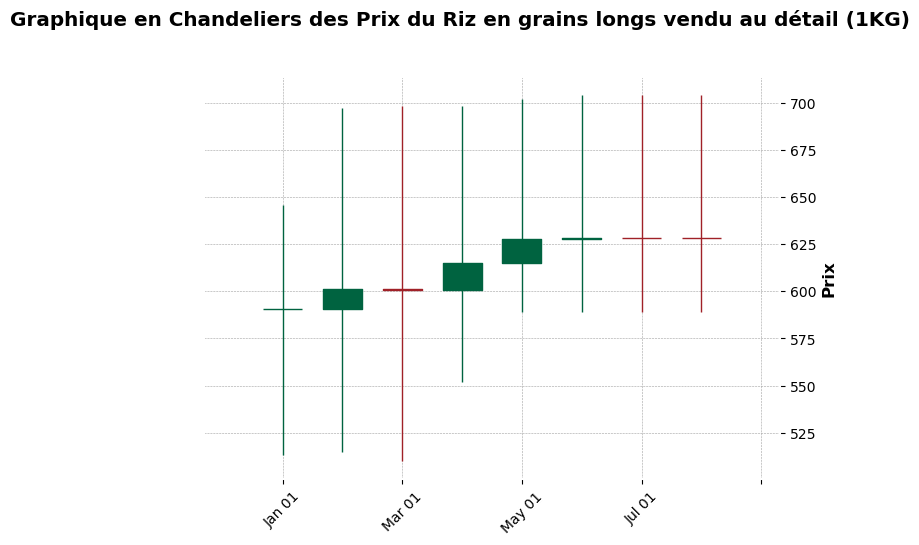

In [4]:
# Utilisation de la fonction 
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Riz en grains longs vendu au détail (1KG).csv"
chart_title = "Graphique en Chandeliers des Prix du Riz en grains longs vendu au détail (1KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix du Haricot blanc (1 KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   763
1   02/12/23  Porto-Novo   676
2   03/12/23     Parakou   758
3   04/12/23  Natitingou   595
4   05/12/23     Bohicon   504
5   06/12/23     Lokossa   677
6   01/01/24     Cotonou   760
7   02/01/24  Porto-Novo   668
8   03/01/24     Parakou   760
9   04/01/24  Natitingou   595
10  05/01/24     Bohicon   504
11  06/01/24     Lokossa   677
12  01/02/24     Cotonou   763
13  02/02/24  Porto-Novo   660
14  03/02/24     Parakou   761
15  04/02/24  Natitingou   599
16  05/02/24     Bohicon   504
17  06/02/24     Lokossa   676
18  01/03/24     Cotonou   764
19  02/03/24  Porto-Novo   654
20  03/03/24     Parakou   760
21  04/03/24  Natitingou   597
22  05/03/24     Bohicon   509
23  06/03/24     Lokossa   676
24  01/04/24     Cotonou   803
25  02/04/24  Porto-Novo   747
26  03/04/24     Parakou   764
27  04/04/24  Natitingou   617
28  05/04/24     Bohicon   627
29  06/04/24     Lokossa   698
30  01/05/24     

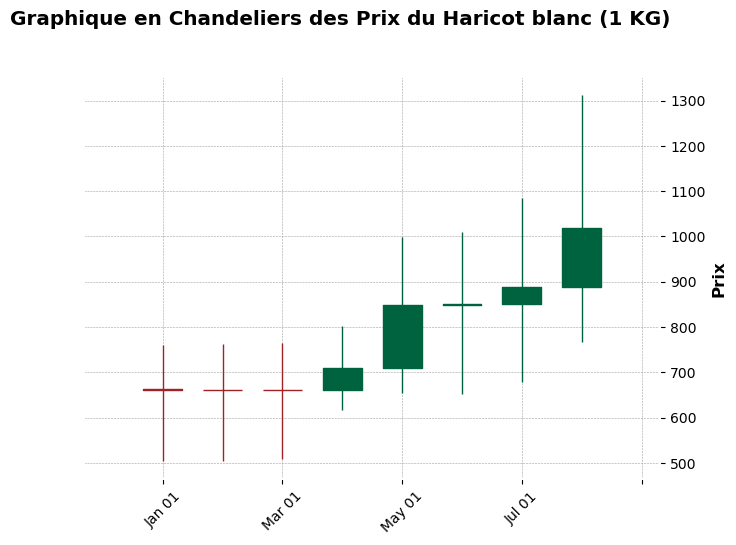

In [5]:
# Utilisation de la fonction
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Haricot blanc (1 KG).csv"
chart_title = "Graphique en Chandeliers des Prix du Haricot blanc (1 KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix du Gari 2ème qualité (1 KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   351
1   01/12/23  Porto-Novo   306
2   01/12/23     Parakou   410
3   01/12/23  Natitingou   474
4   01/12/23     Bohicon   225
5   01/12/23     Lokossa   305
6   01/01/24     Cotonou   350
7   02/01/24  Porto-Novo   306
8   03/01/24     Parakou   409
9   04/01/24  Natitingou   467
10  05/01/24     Bohicon   227
11  06/01/24     Lokossa   305
12  01/02/24     Cotonou   352
13  02/02/24  Porto-Novo   305
14  03/02/24     Parakou   407
15  04/02/24  Natitingou   467
16  05/02/24     Bohicon   228
17  06/02/24     Lokossa   306
18  01/03/24     Cotonou   351
19  02/03/24  Porto-Novo   303
20  03/03/24     Parakou   401
21  04/03/24  Natitingou   464
22  05/03/24     Bohicon   224
23  06/03/24     Lokossa   308
24  01/04/24     Cotonou   352
25  02/04/24  Porto-Novo   305
26  03/04/24     Parakou   397
27  04/04/24  Natitingou   465
28  05/04/24     Bohicon   265
29  06/04/24     Lokossa   308
30  01/05/24     

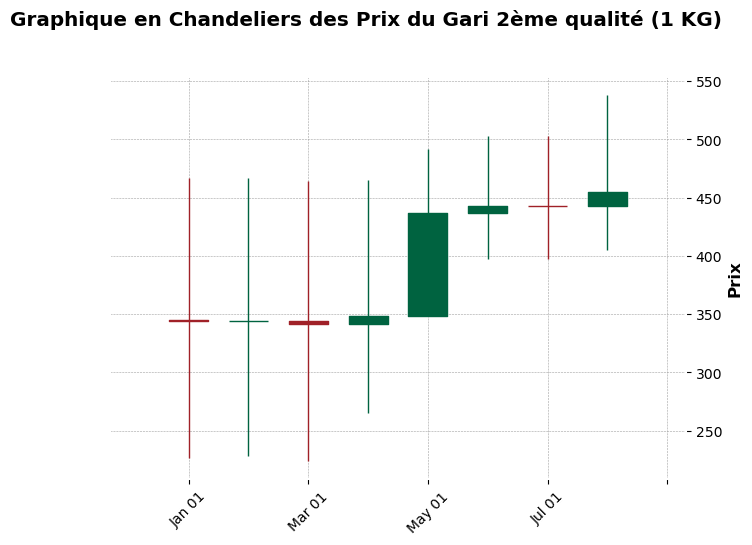

In [6]:
# Utilisation de la fonction 
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Gari 2ème qualité (1 KG).csv"
chart_title = "Graphique en Chandeliers des Prix du Gari 2ème qualité (1 KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix du Mil (1 KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   711
1   02/12/23  Porto-Novo   623
2   03/12/23     Parakou   511
3   04/12/23  Natitingou   439
4   05/12/23     Bohicon   485
5   06/12/23     Lokossa   697
6   01/01/24     Cotonou   679
7   02/01/24  Porto-Novo   599
8   03/01/24     Parakou   484
9   04/01/24  Natitingou   390
10  05/01/24     Bohicon   468
11  06/01/24     Lokossa   696
12  01/02/24     Cotonou   654
13  02/02/24  Porto-Novo   545
14  03/02/24     Parakou   443
15  04/02/24  Natitingou   348
16  05/02/24     Bohicon   424
17  06/02/24     Lokossa   650
18  01/03/24     Cotonou   676
19  02/03/24  Porto-Novo   537
20  03/03/24     Parakou   448
21  04/03/24  Natitingou   333
22  05/03/24     Bohicon   437
23  06/03/24     Lokossa   654
24  01/04/24     Cotonou   686
25  02/04/24  Porto-Novo   537
26  03/04/24     Parakou   505
27  04/04/24  Natitingou   336
28  05/04/24     Bohicon   471
29  06/04/24     Lokossa   663
30  01/05/24     

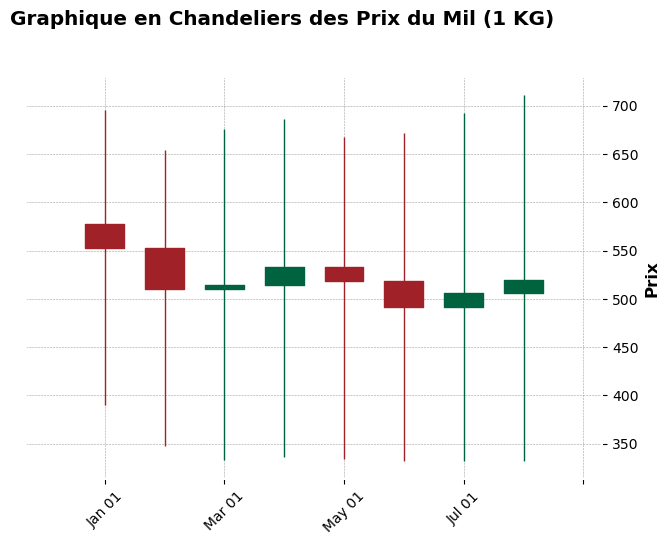

In [7]:
# Utilisation de la fonction 
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix - Mil  (1KG).csv"
chart_title = "Graphique en Chandeliers des Prix du Mil (1 KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix d'Oignon frais rond (1 KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   750
1   02/12/23  Porto-Novo   866
2   03/12/23     Parakou   474
3   04/12/23  Natitingou   569
4   05/12/23     Bohicon   682
5   06/12/23     Lokossa   719
6   01/01/24     Cotonou   638
7   02/01/24  Porto-Novo   753
8   03/01/24     Parakou   400
9   04/01/24  Natitingou   481
10  05/01/24     Bohicon   591
11  06/01/24     Lokossa   638
12  01/02/24     Cotonou   540
13  02/02/24  Porto-Novo   649
14  03/02/24     Parakou   337
15  04/02/24  Natitingou   409
16  05/02/24     Bohicon   510
17  06/02/24     Lokossa   560
18  01/03/24     Cotonou   421
19  02/03/24  Porto-Novo   516
20  03/03/24     Parakou   256
21  04/03/24  Natitingou   312
22  05/03/24     Bohicon   404
23  06/03/24     Lokossa   456
24  01/04/24     Cotonou   338
25  02/04/24  Porto-Novo   421
26  03/04/24     Parakou   203
27  04/04/24  Natitingou   249
28  05/04/24     Bohicon   329
29  06/04/24     Lokossa   372
30  01/05/24     

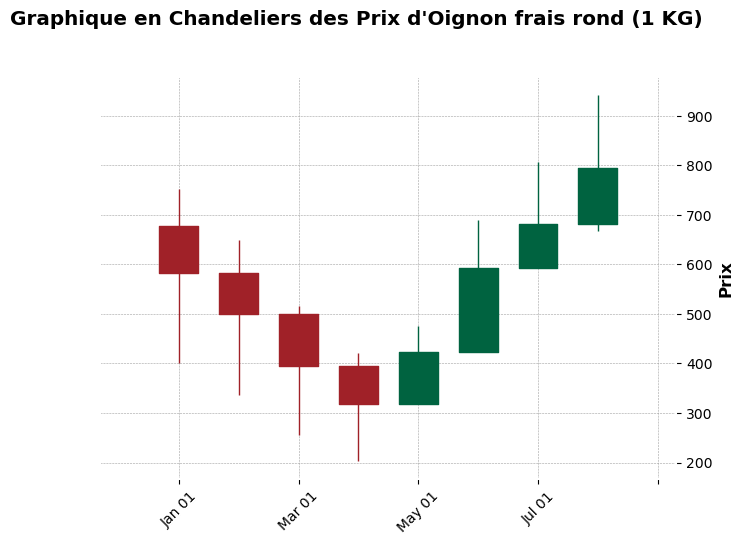

In [8]:
# Utilisation de la fonction 
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Oignon frais rond (1 KG).csv"
chart_title = "Graphique en Chandeliers des Prix d'Oignon frais rond (1 KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix du Sorgho (1KG) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   668
1   02/12/23  Porto-Novo   604
2   03/12/23     Parakou   464
3   04/12/23  Natitingou   385
4   05/12/23     Bohicon   565
5   06/12/23     Lokossa   749
6   01/01/24     Cotonou   619
7   02/01/24  Porto-Novo   606
8   03/01/24     Parakou   432
9   04/01/24  Natitingou   336
10  05/01/24     Bohicon   551
11  06/01/24     Lokossa   741
12  01/02/24     Cotonou   593
13  02/02/24  Porto-Novo   603
14  03/02/24     Parakou   392
15  04/02/24  Natitingou   276
16  05/02/24     Bohicon   468
17  06/02/24     Lokossa   687
18  01/03/24     Cotonou   553
19  02/03/24  Porto-Novo   608
20  03/03/24     Parakou   302
21  04/03/24  Natitingou   217
22  05/03/24     Bohicon   442
23  06/03/24     Lokossa   652
24  01/04/24     Cotonou   554
25  02/04/24  Porto-Novo   609
26  03/04/24     Parakou   303
27  04/04/24  Natitingou   224
28  05/04/24     Bohicon   443
29  06/04/24     Lokossa   651
30  01/05/24     

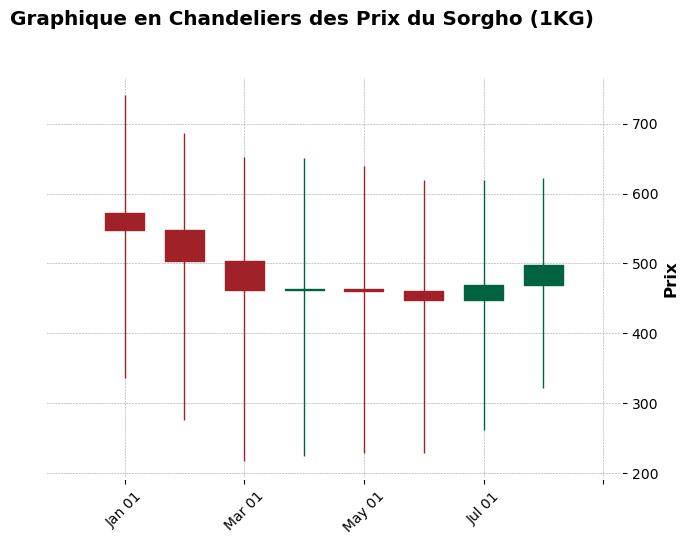

In [9]:
# Utilisation de la fonction 
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Sorgho  (1KG).csv"
chart_title = "Graphique en Chandeliers des Prix du Sorgho (1KG)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)

## Variation du prix d'Essence Kpayo (1 L) entre Janvier 2024 et Août 2024

DataFrame d'origine :
        Date       Ville  Prix
0   01/12/23     Cotonou   579
1   02/12/23  Porto-Novo   506
2   03/12/23     Parakou   582
3   04/12/23  Natitingou   615
4   05/12/23     Bohicon   583
5   06/12/23     Lokossa   595
6   01/01/24     Cotonou   535
7   02/01/24  Porto-Novo   473
8   03/01/24     Parakou   533
9   04/01/24  Natitingou   590
10  05/01/24     Bohicon   546
11  06/01/24     Lokossa   554
12  01/02/24     Cotonou   546
13  02/02/24  Porto-Novo   431
14  03/02/24     Parakou   487
15  04/02/24  Natitingou   554
16  05/02/24     Bohicon   514
17  06/02/24     Lokossa   529
18  01/03/24     Cotonou   575
19  02/03/24  Porto-Novo   469
20  03/03/24     Parakou   467
21  04/03/24  Natitingou   542
22  05/03/24     Bohicon   513
23  06/03/24     Lokossa   527
24  01/04/24     Cotonou   675
25  02/04/24  Porto-Novo   575
26  03/04/24     Parakou   575
27  04/04/24  Natitingou   646
28  05/04/24     Bohicon   667
29  06/04/24     Lokossa   660
30  01/05/24     

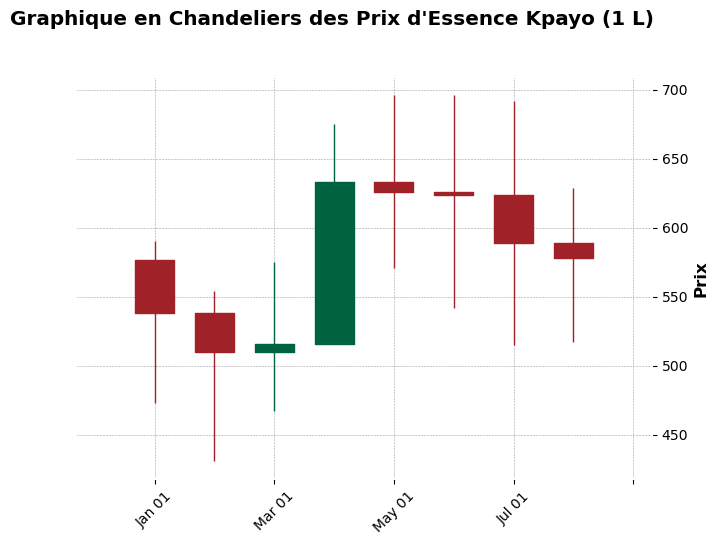

In [10]:
# Utilisation de la fonction 
file_path = r"D:\Notions\Projets d'analyse de données\Evolution Prix\Prix- Essence Kpayo (1 L).csv"
chart_title = "Graphique en Chandeliers des Prix d'Essence Kpayo (1 L)"  

# Appel de la fonction
process_and_plot_candlestick_data(file_path, chart_title)